# Case Study 1 : Data Mining in Financial Data

**Financial Data Collection:** 
* Please collect five-year stock price data of at least 5 stocks. You can choose any stocks you'd like to analyze.
* You have multiple ways of collecting financial data with Python, here is a reference: https://www.alpharithms.com/python-financial-data-491110/
* Load the data you collect and start working on your idea.


# Problem: pick a data science problem that you plan to solve using Stock Price Data
* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using the data available and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

**Problem Statement**
The objective of this project is to develop predictive models for stock price forecasting using historical data. The dataset consists of five years of stock price data for multiple companies, including Disney (DIS), Netflix (NFLX), Spotify (SPOT), Amazon (AMZN), and Live Nation Entertainment (LYV). The primary goal is to assess different machine learning and statistical models to determine which approach provides the most accurate predictions.

By leveraging models such as ARIMA (AutoRegressive Integrated Moving Average) and XGBoost (Extreme Gradient Boosting), the project aims to evaluate their effectiveness in forecasting future stock prices. This study is crucial for financial planning, risk assessment, and investment strategy, as accurate predictions can help investors make informed decisions, mitigate potential losses, and optimize their portfolios.

Additionally, the project seeks to compare the strengths and weaknesses of different modeling approaches to identify the best-performing method for time-series forecasting in stock markets.

# Data Collection/Processing: 

In [1]:
#----------------------------------------------
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


import yfinance as yf 


stocks = ['DIS', 'NFLX', 'SPOT', 'AMZN', 'LYV'] 
stock_data = {} 


for stock in stocks:
    print(f"Fetching data for {stock}...")
    stock_data[stock] = yf.Ticker(stock).history(period='5y')


print("\nSample data \n ")

for stock, data in stock_data.items():
    print(f"\nData for {stock}:")
    print(data.head()) 





Fetching data for DIS...
Fetching data for NFLX...
Fetching data for SPOT...
Fetching data for AMZN...
Fetching data for LYV...

Sample data 
 

Data for DIS:
                                 Open        High         Low       Close  \
Date                                                                        
2020-02-05 00:00:00-05:00  144.811056  145.502511  136.879047  139.644867   
2020-02-06 00:00:00-05:00  140.188168  142.193395  139.496713  140.958649   
2020-02-07 00:00:00-05:00  140.158527  140.257313  138.410122  139.299149   
2020-02-10 00:00:00-05:00  139.309015  140.849976  138.745978  140.849976   
2020-02-11 00:00:00-05:00  141.106819  141.245110  138.745985  139.289261   

                             Volume  Dividends  Stock Splits  
Date                                                          
2020-02-05 00:00:00-05:00  27824100        0.0           0.0  
2020-02-06 00:00:00-05:00   9504600        0.0           0.0  
2020-02-07 00:00:00-05:00  10948900        0.0   

In [2]:
# Data Verification 

import pandas as pd

for stock, data in stock_data.items():
    print(f"\nData Verification for {stock}:")

    # Show basic info
    print(data.info())  

    # Check for missing values
    print("\nMissing Values:")
    print(data.isnull().sum())

    # Verify columns
    expected_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
    print("\nColumns in dataset:", list(data.columns))
    
    missing_cols = [col for col in expected_columns if col not in data.columns]
    extra_cols = [col for col in data.columns if col not in expected_columns]

    if not missing_cols and not extra_cols:
        print("All expected columns are present.")
    else:
        if missing_cols:
            print(f"Missing columns: {missing_cols}")
        if extra_cols:
            print(f"Unexpected columns: {extra_cols}")

    # Check index type
    print("\nIndex Type Check:")
    print("Valid DateTime index." if isinstance(data.index, pd.DatetimeIndex) else "Warning: Index is not a DateTime index.")

  
    



Data Verification for DIS:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-02-05 00:00:00-05:00 to 2025-02-04 00:00:00-05:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1257 non-null   float64
 1   High          1257 non-null   float64
 2   Low           1257 non-null   float64
 3   Close         1257 non-null   float64
 4   Volume        1257 non-null   int64  
 5   Dividends     1257 non-null   float64
 6   Stock Splits  1257 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 78.6 KB
None

Missing Values:
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Columns in dataset: ['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits']
All expected columns are present.

Index Type Check:
Valid DateTime index.

Data Verification for NFLX:
<class 'pandas.core.fr

# Data Exploration: Exploring the Dataset

**Plot the daily, weekly and monthly returns of a set of stocks of your choice** 
* references:
    * https://www.investopedia.com/terms/y/yearly-rate-of-return-method.asp
    * https://www.fool.com/knowledge-center/how-to-calculate-a-monthly-return-on-investment/#:~:text=Take%20the%20ending%20balance%2C%20and,corresponds%20to%20your%20monthly%20return.
    * https://www.investopedia.com/terms/i/intraday-return.asp#:~:text=How%20Is%20Daily%20Return%20Calculated,price%2C%20then%20multiply%20by%20100. 



Exploring Data for DIS


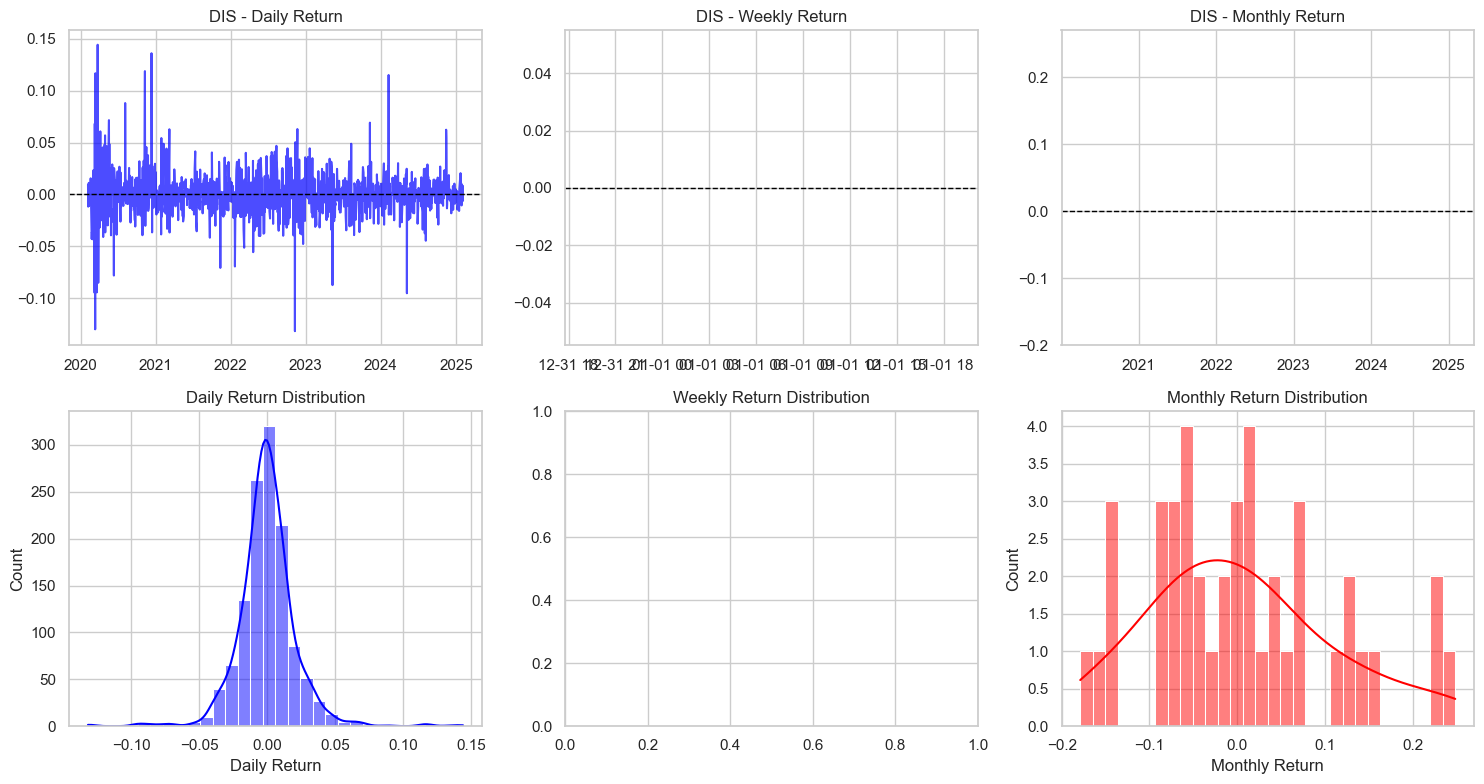


Exploring Data for NFLX


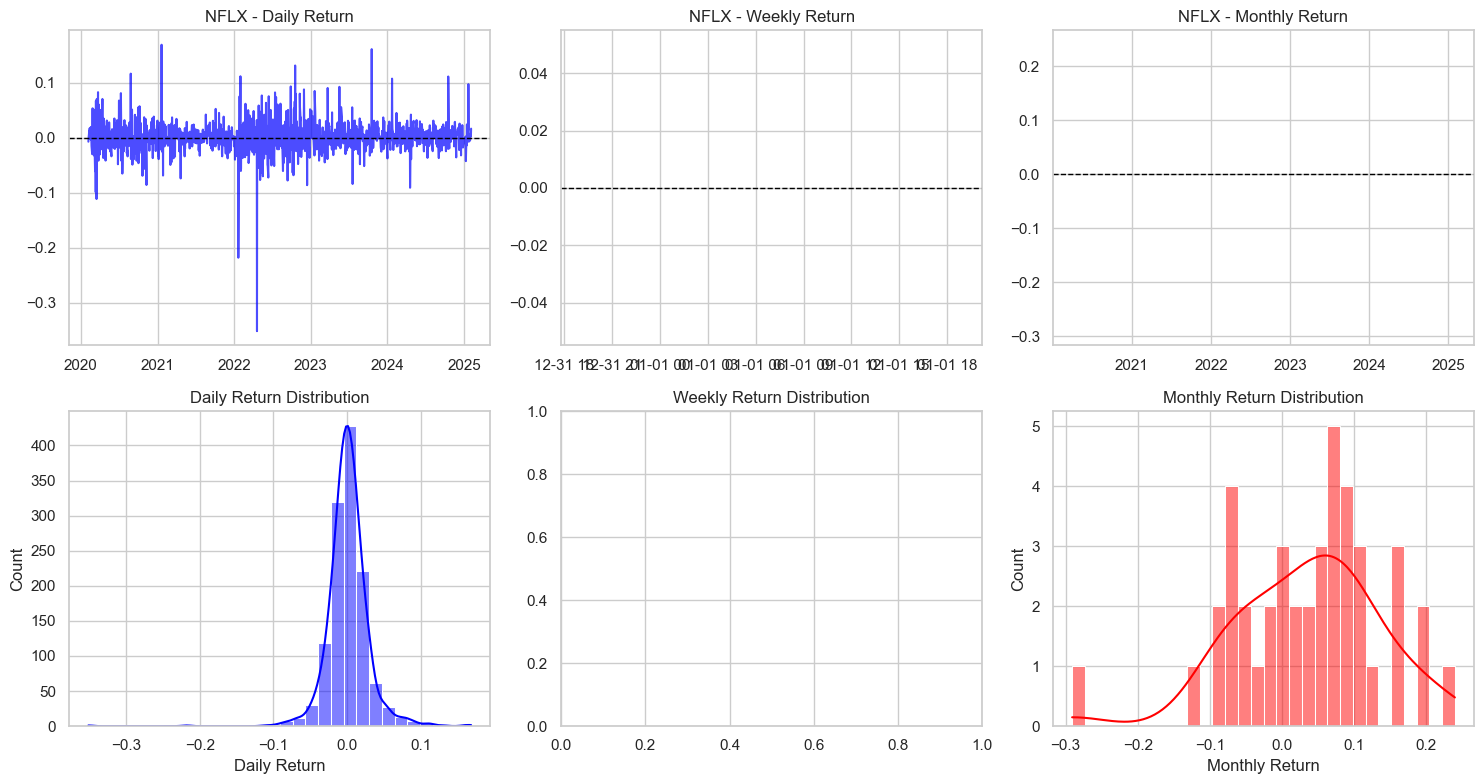


Exploring Data for SPOT


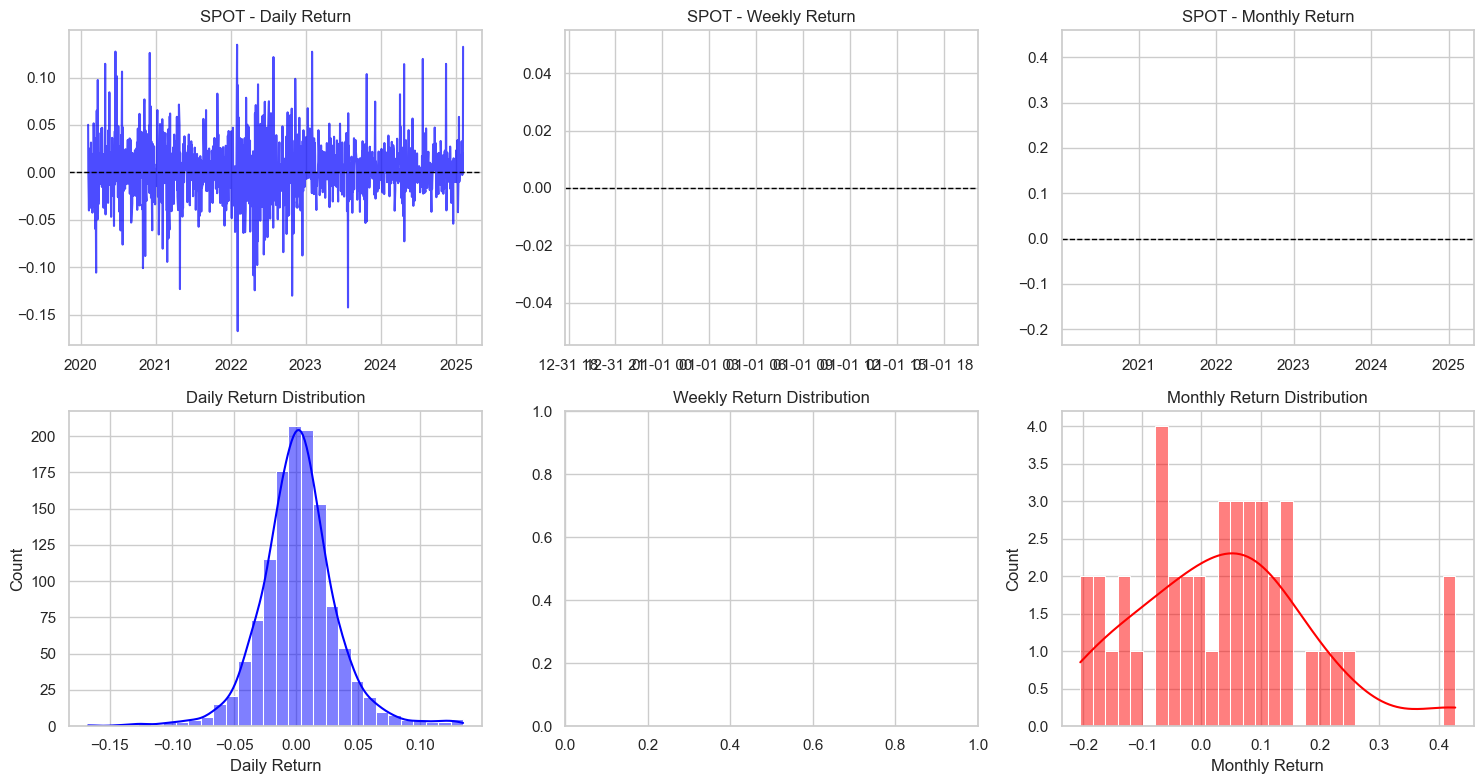


Exploring Data for AMZN


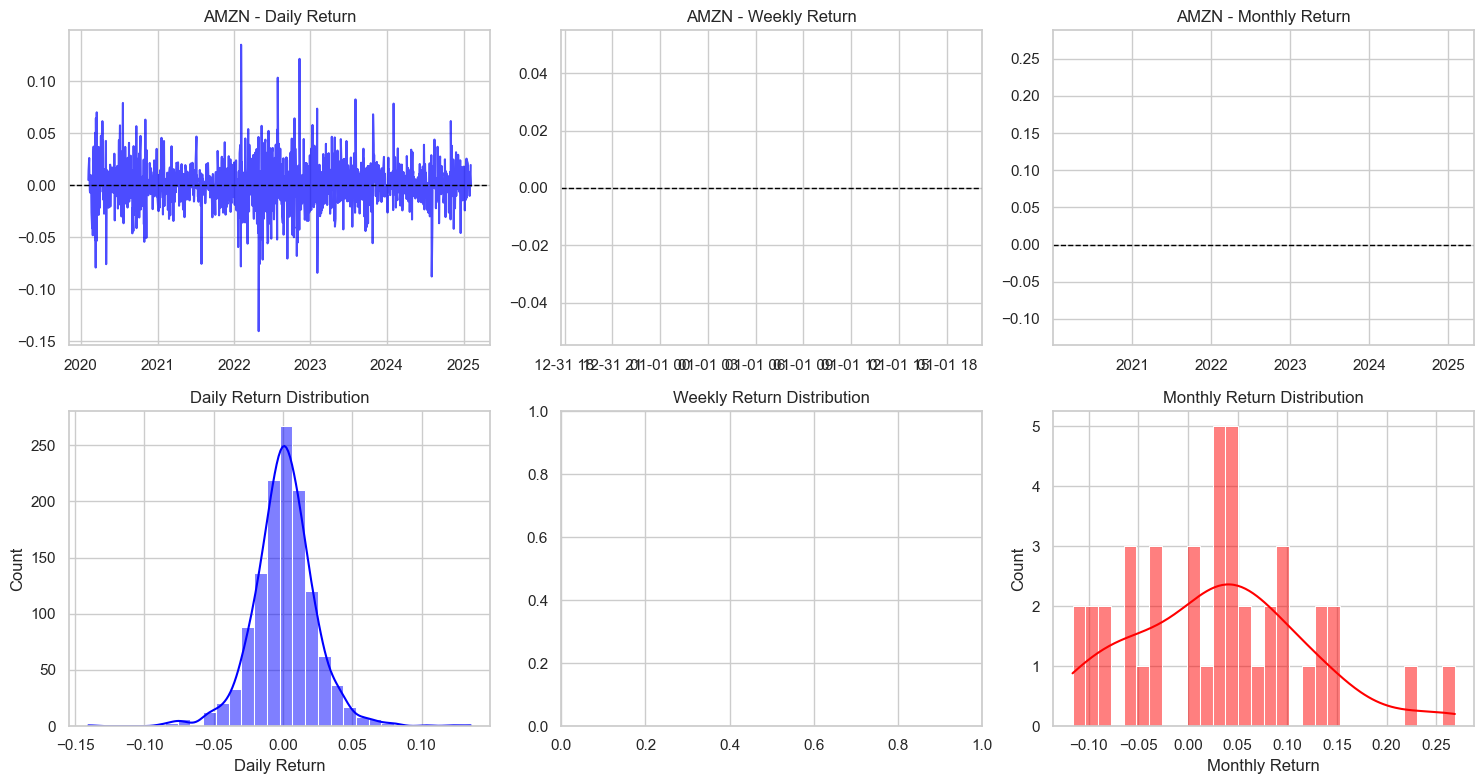


Exploring Data for LYV


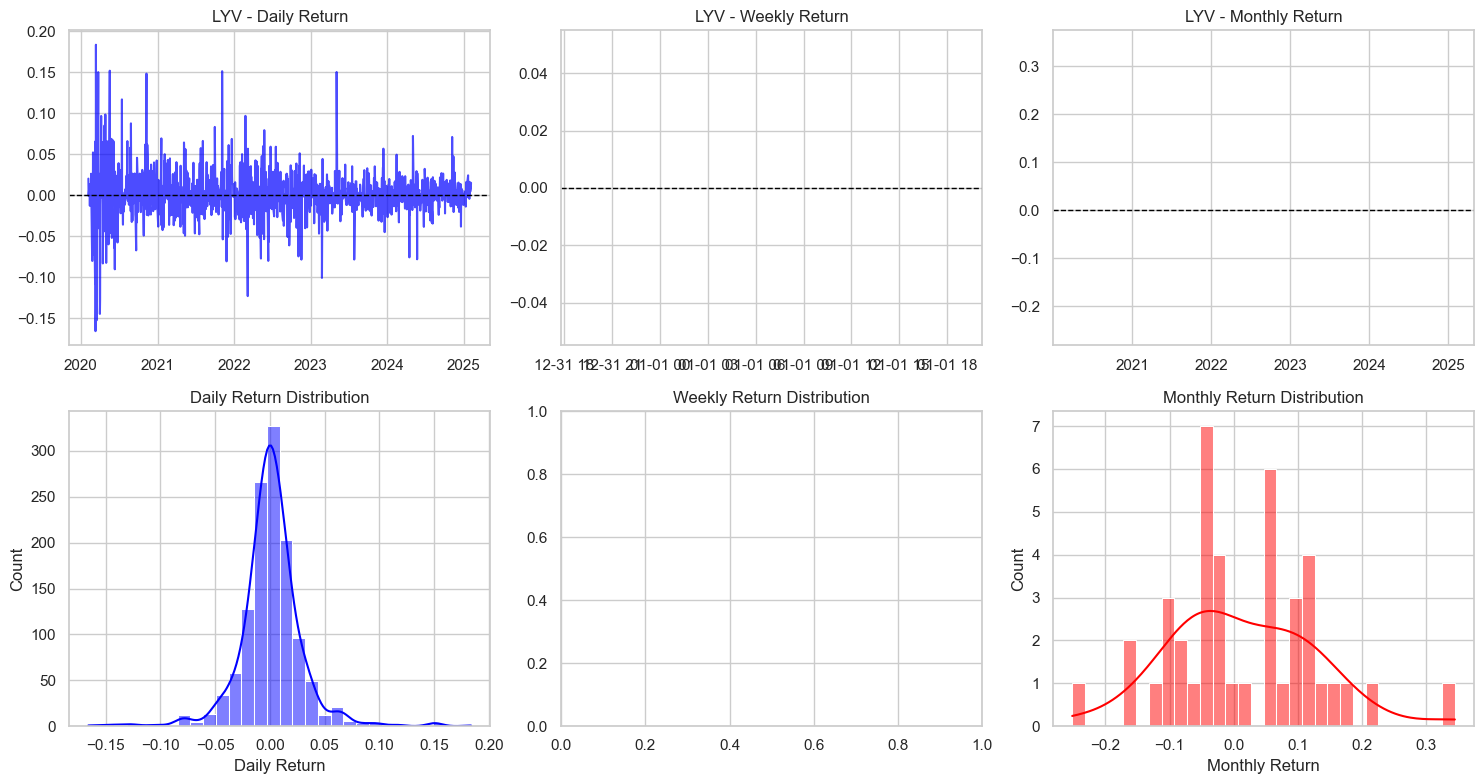

In [5]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")  

for stock, data in stock_data.items():
    print(f"\nExploring Data for {stock}")

    data = data.sort_index()
    
    data['Daily Return'] = data['Close'].pct_change()
    data['Weekly Return'] = data['Close'].resample('W').ffill().pct_change()
    data['Monthly Return'] = data['Close'].resample('ME').ffill().pct_change()  

    fig, axes = plt.subplots(2, 3, figsize=(15, 8))

    # Plot daily, weekly, and monthly returns as time series
    returns = ['Daily Return', 'Weekly Return', 'Monthly Return']
    colors = ['blue', 'green', 'red']

    for i, (ret, color) in enumerate(zip(returns, colors)):
        axes[0, i].plot(data.index, data[ret], color=color, alpha=0.7)
        axes[0, i].set_title(f'{stock} - {ret}')
        axes[0, i].axhline(y=0, color='black', linestyle='--', linewidth=1)
        axes[0, i].grid(True)

        sns.histplot(data[ret].dropna(), kde=True, bins=30, color=color, ax=axes[1, i])
        axes[1, i].set_title(f'{ret} Distribution')

    # Improve layout
    plt.tight_layout()
    plt.show()




Other data explorations you would like to present:


Exploring Additional Data for DIS


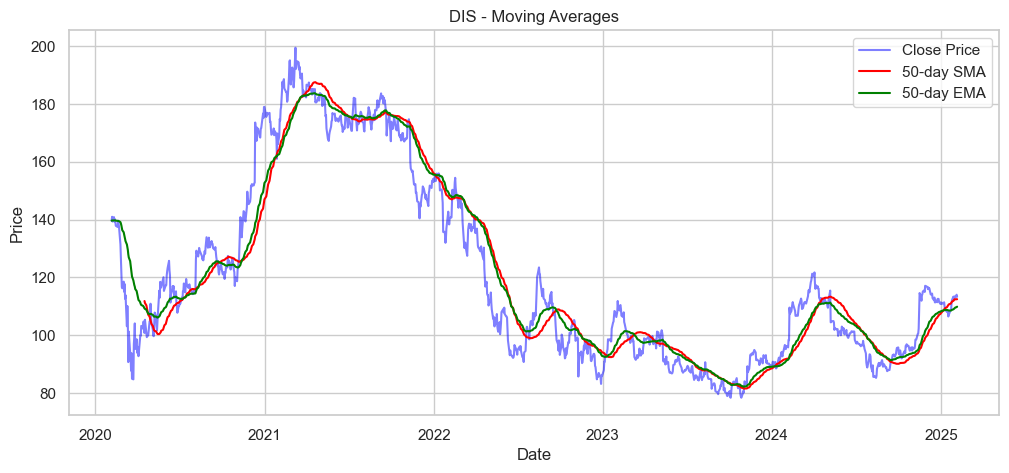

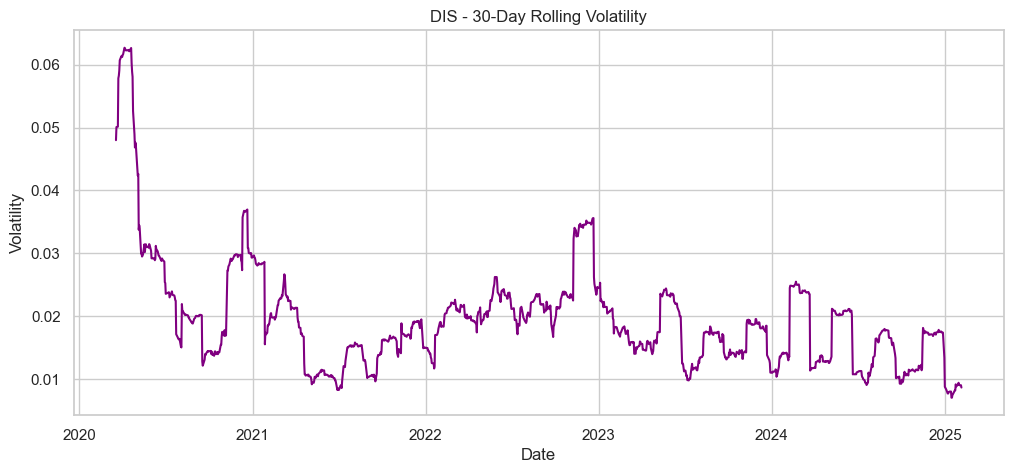

Displaying candlestick chart for DIS


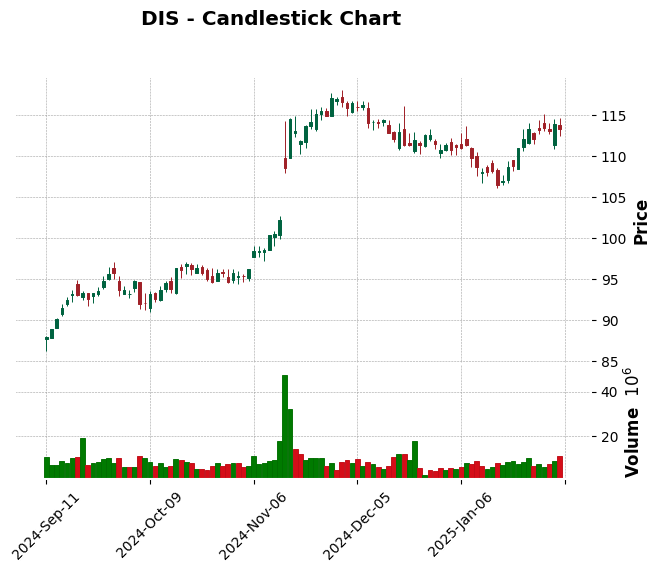

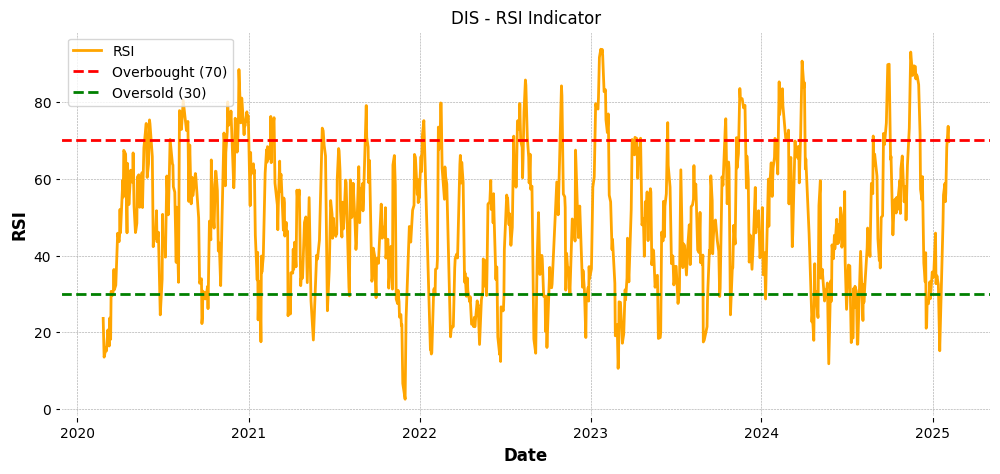


Exploring Additional Data for NFLX


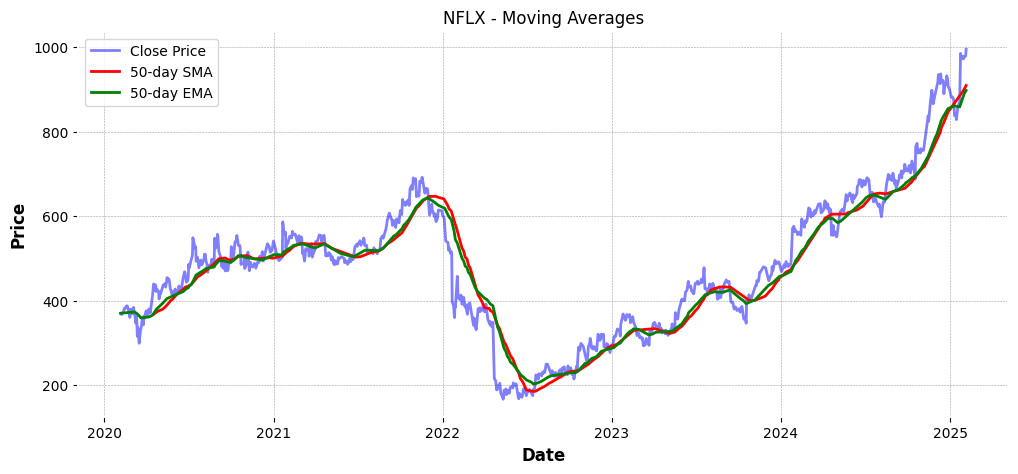

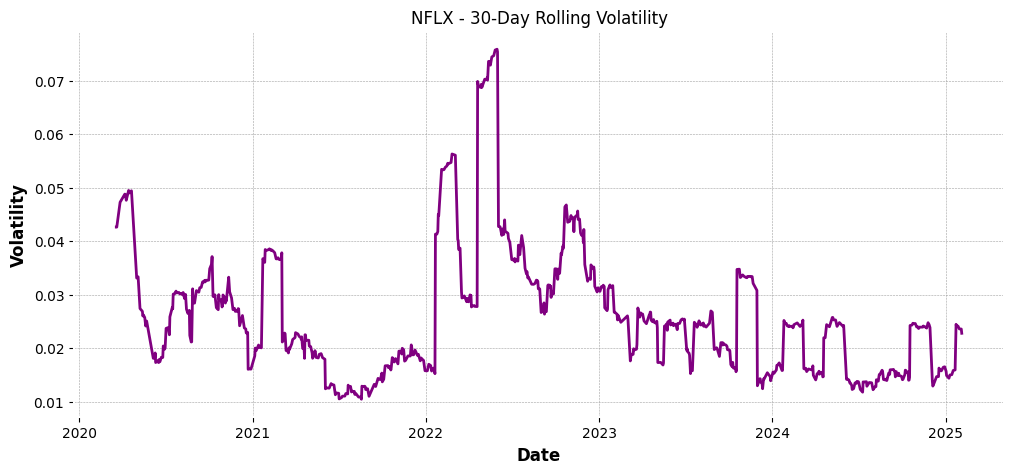

Displaying candlestick chart for NFLX


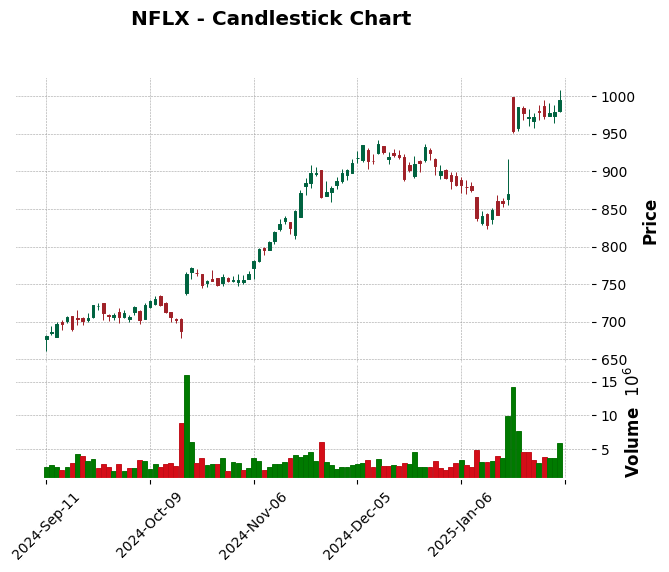

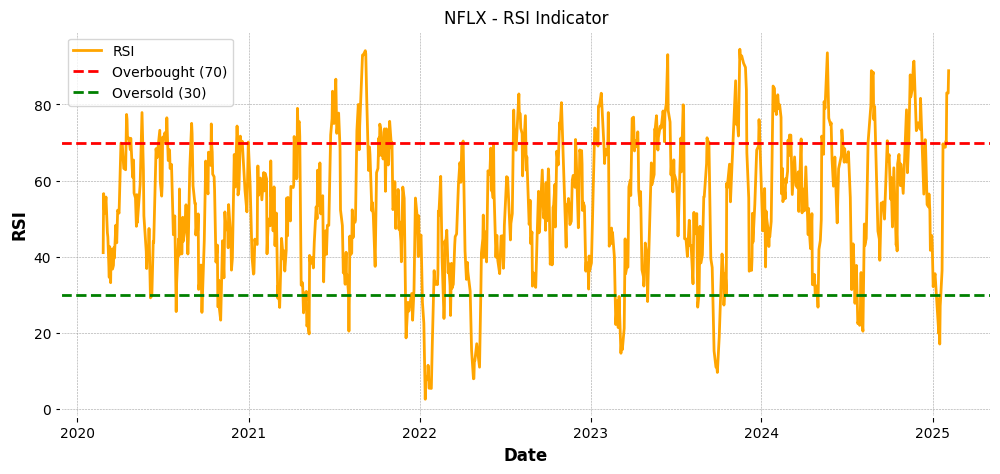


Exploring Additional Data for SPOT


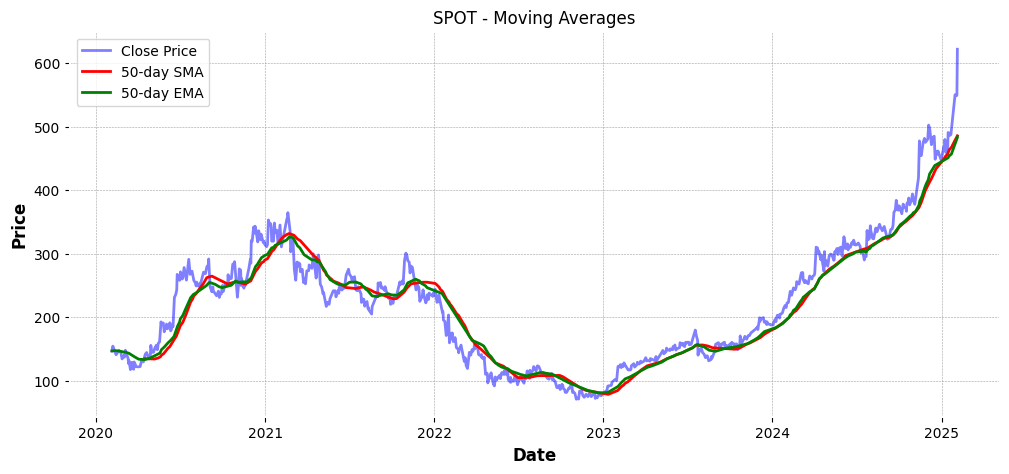

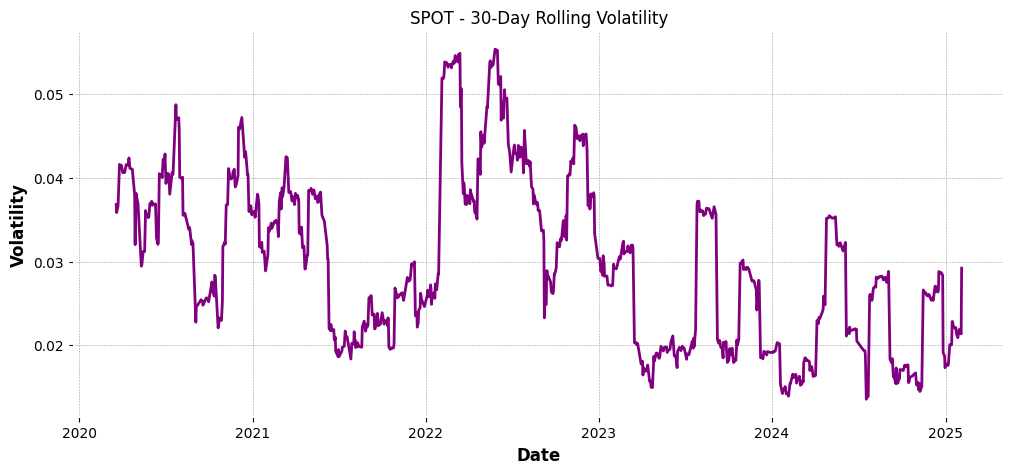

Displaying candlestick chart for SPOT


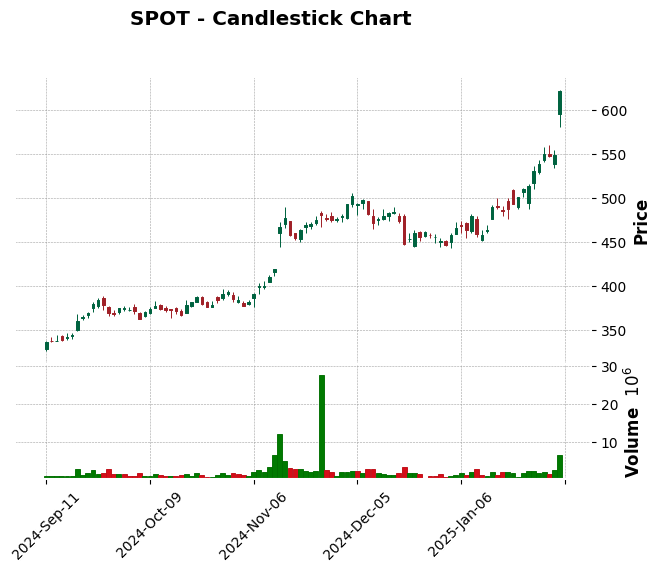

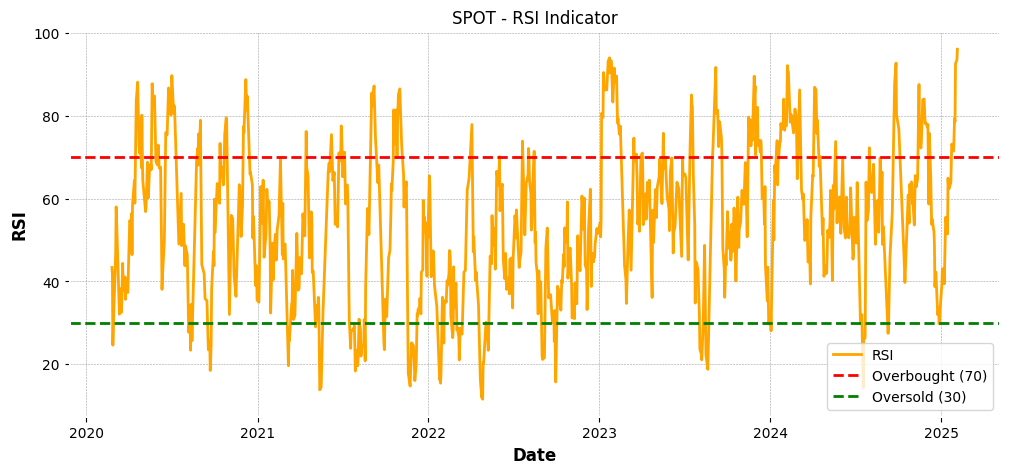


Exploring Additional Data for AMZN


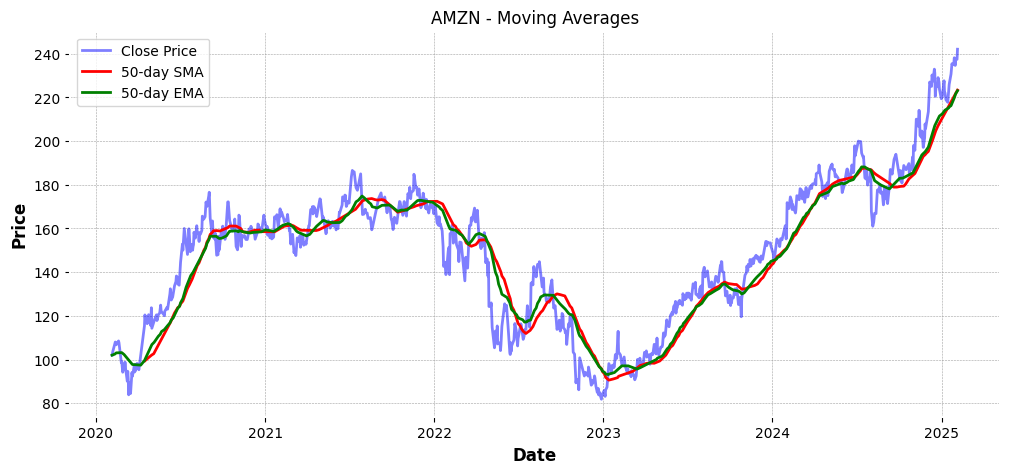

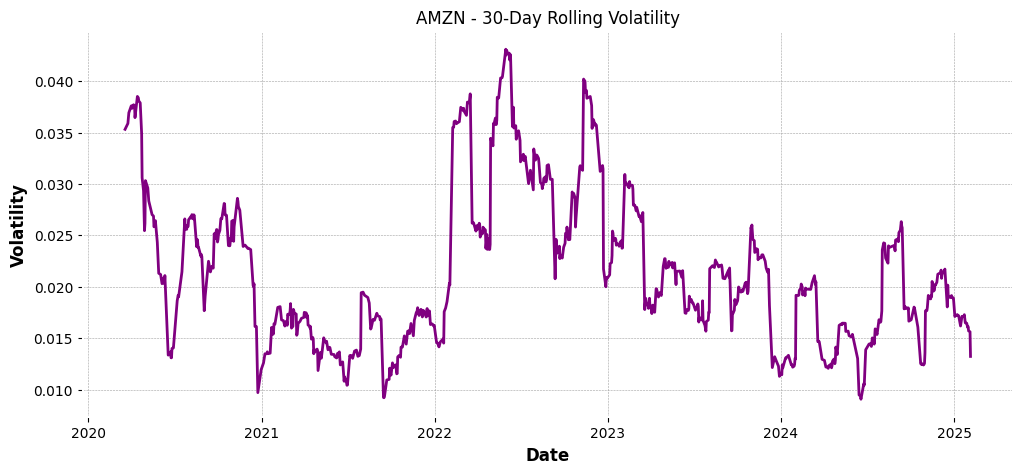

Displaying candlestick chart for AMZN


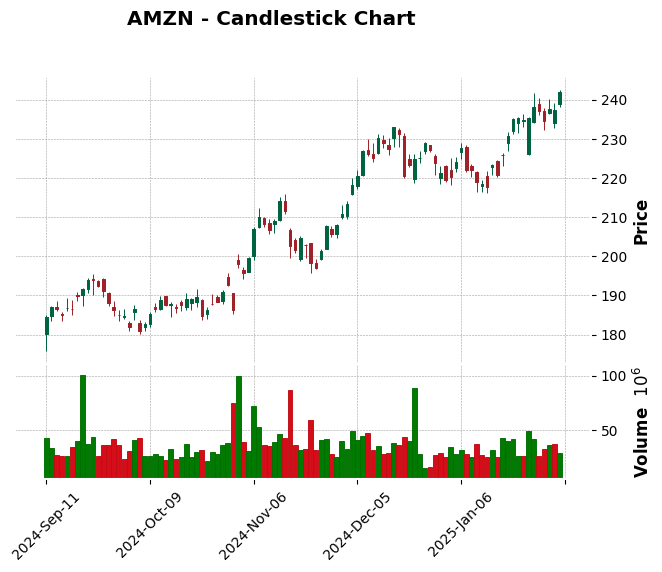

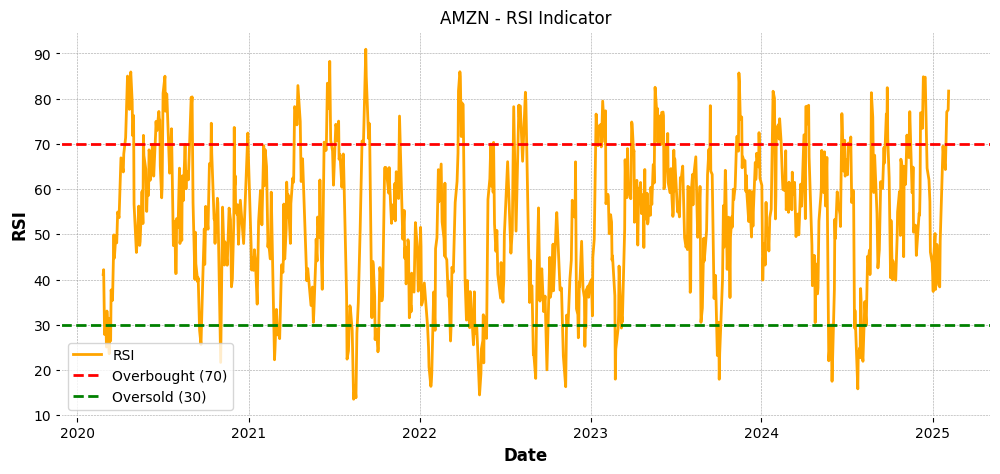


Exploring Additional Data for LYV


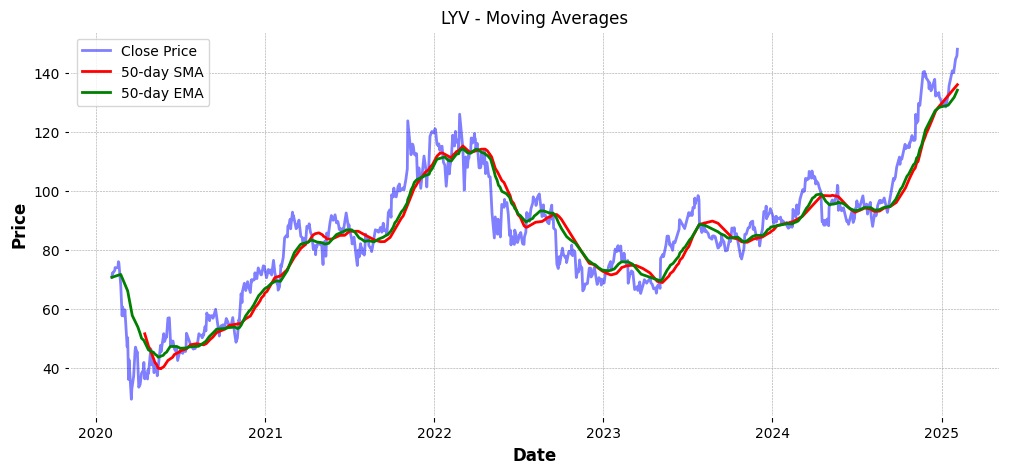

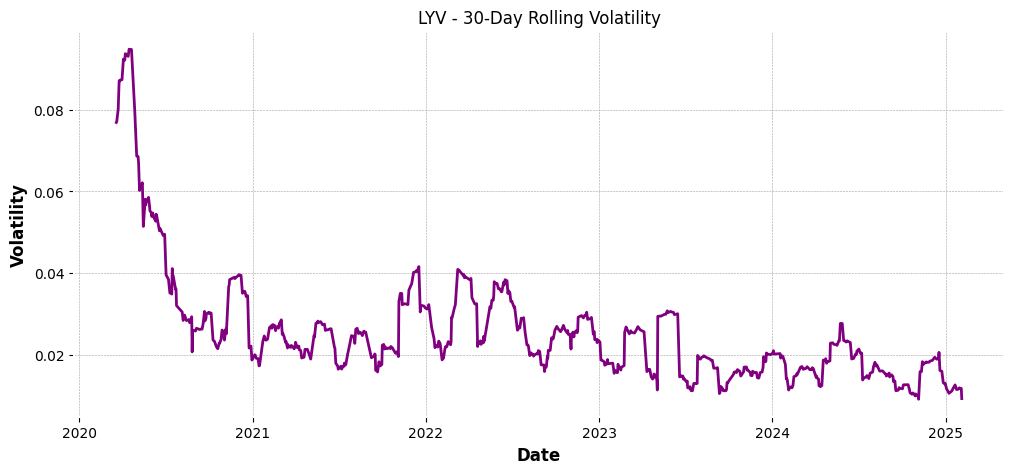

Displaying candlestick chart for LYV


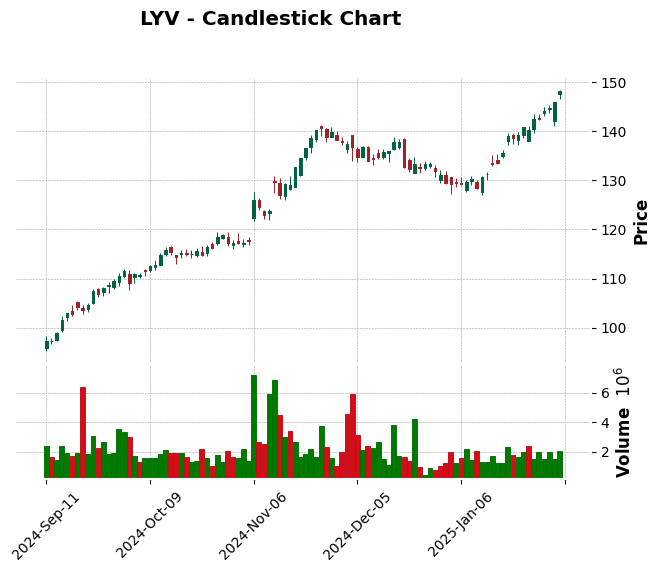

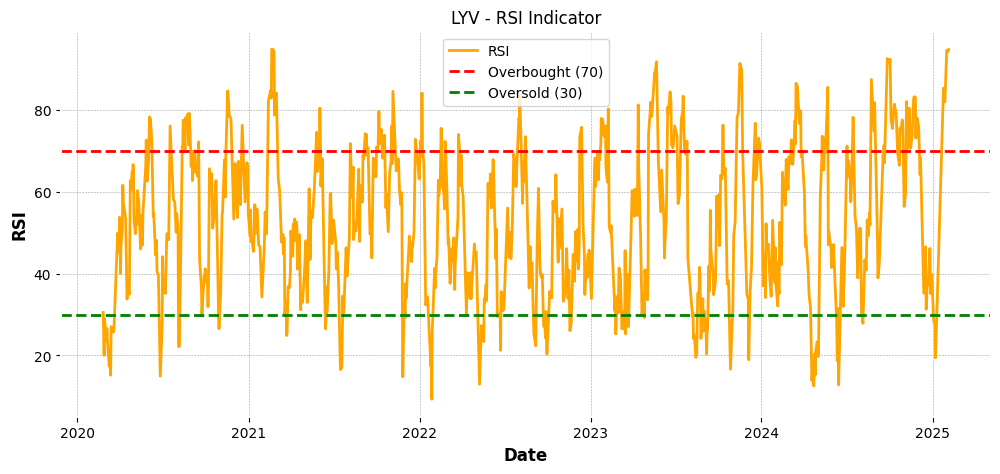

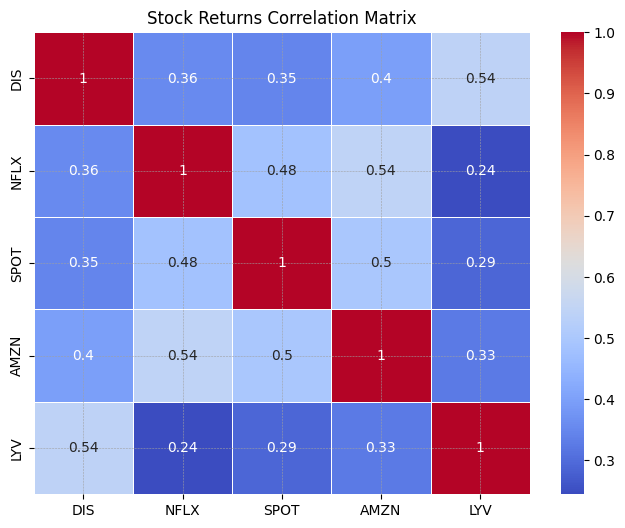

In [7]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mplfinance as mpf

sns.set(style="whitegrid") 

for stock, data in stock_data.items():
    print(f"\nExploring Additional Data for {stock}")

    # Ensure data is sorted by date
    data = data.sort_index()

    data['SMA_50'] = data['Close'].rolling(window=50).mean()
    data['EMA_50'] = data['Close'].ewm(span=50, adjust=False).mean()

    plt.figure(figsize=(12, 5))
    plt.plot(data.index, data['Close'], label='Close Price', color='blue', alpha=0.5)
    plt.plot(data.index, data['SMA_50'], label='50-day SMA', color='red')
    plt.plot(data.index, data['EMA_50'], label='50-day EMA', color='green')
    plt.legend()
    plt.title(f"{stock} - Moving Averages")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.grid(True)
    plt.show()

    data['Volatility_30'] = data['Close'].pct_change().rolling(30).std()

    plt.figure(figsize=(12, 5))
    plt.plot(data.index, data['Volatility_30'], color='purple')
    plt.title(f"{stock} - 30-Day Rolling Volatility")
    plt.xlabel("Date")
    plt.ylabel("Volatility")
    plt.grid(True)
    plt.show()


    print(f"Displaying candlestick chart for {stock}")
    mpf.plot(data[-100:], type='candle', style='charles', volume=True, title=f"{stock} - Candlestick Chart")

    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    data['RSI'] = 100 - (100 / (1 + rs))

    plt.figure(figsize=(12, 5))
    plt.plot(data.index, data['RSI'], label="RSI", color='orange')
    plt.axhline(70, linestyle="--", color='red', label="Overbought (70)")
    plt.axhline(30, linestyle="--", color='green', label="Oversold (30)")
    plt.title(f"{stock} - RSI Indicator")
    plt.xlabel("Date")
    plt.ylabel("RSI")
    plt.legend()
    plt.grid(True)
    plt.show()

stock_returns = pd.DataFrame({stock: data['Close'].pct_change() for stock, data in stock_data.items()})
correlation_matrix = stock_returns.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Stock Returns Correlation Matrix")
plt.show()


# The Solution: implement a data science solution to the problem you are trying to solve.

**Briefly describe the idea of your solutions to the problem in the following cell (you should use at least 2 methods/models to solve the problem, and compare the performance. Feel free to use any machine learning models or statistical models.):**

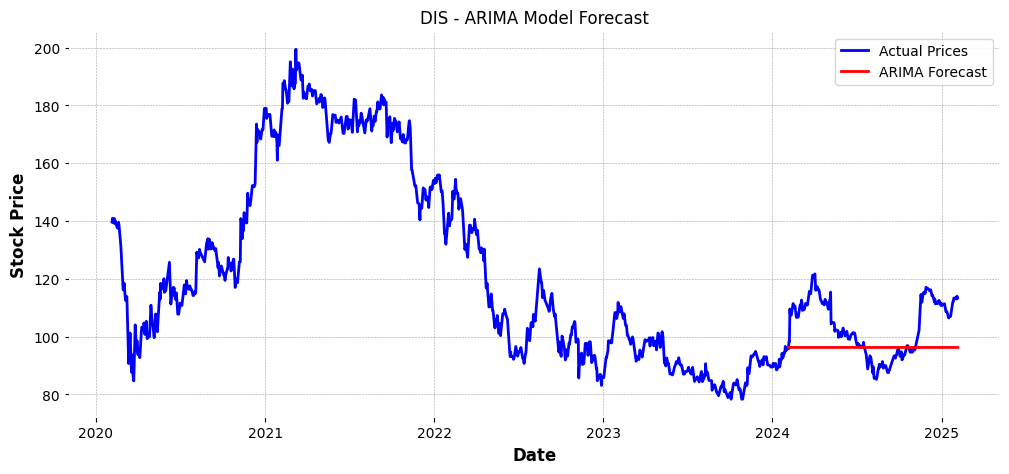

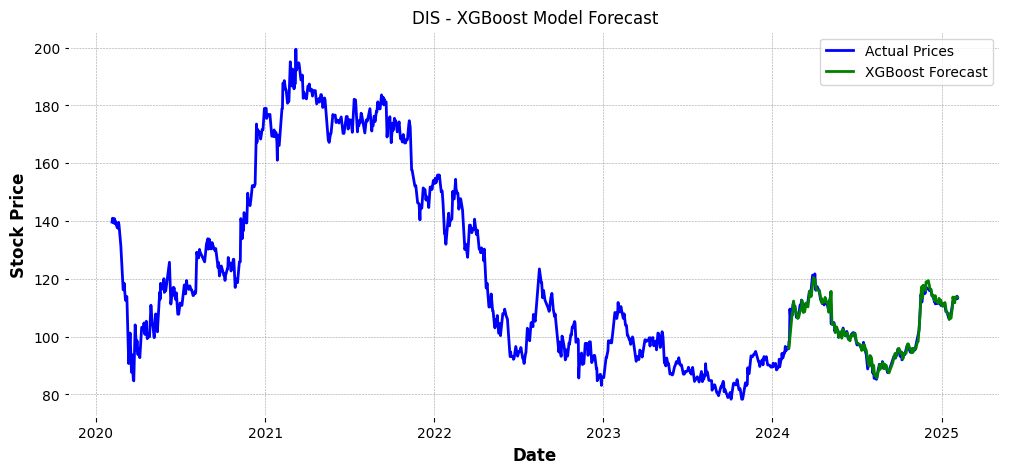

 Model Performance Comparison for DIS:
ARIMA -> MAE: 9.8672, RMSE: 11.9308
XGBoost -> MAE: 103.2566, RMSE: 103.6913


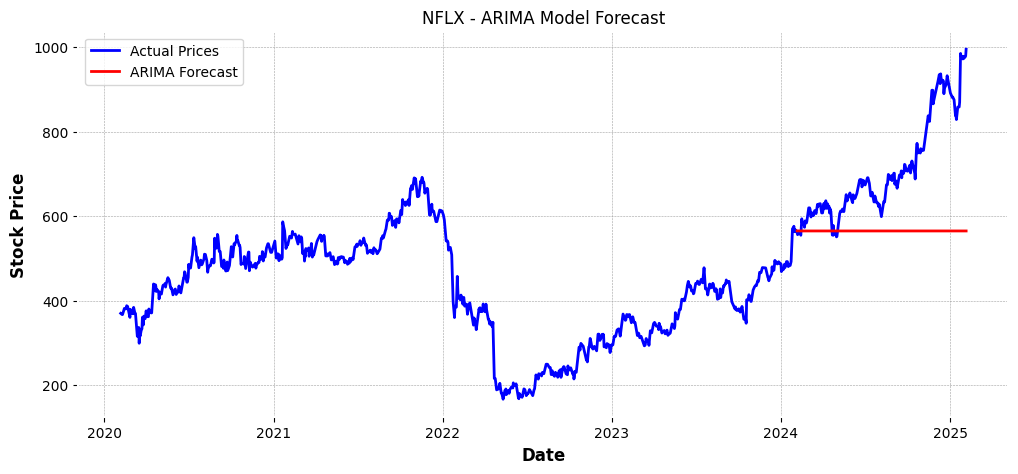

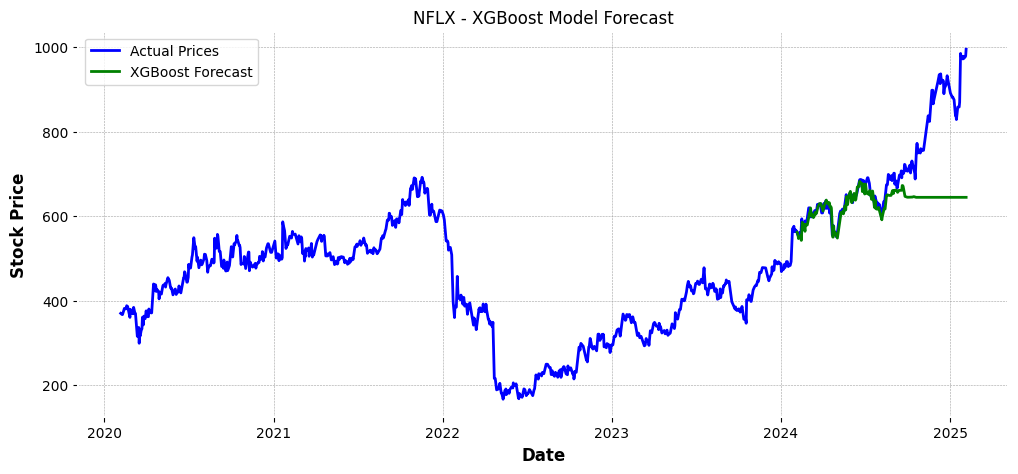

 Model Performance Comparison for NFLX:
ARIMA -> MAE: 145.9473, RMSE: 187.0938
XGBoost -> MAE: 630.9260, RMSE: 631.6239


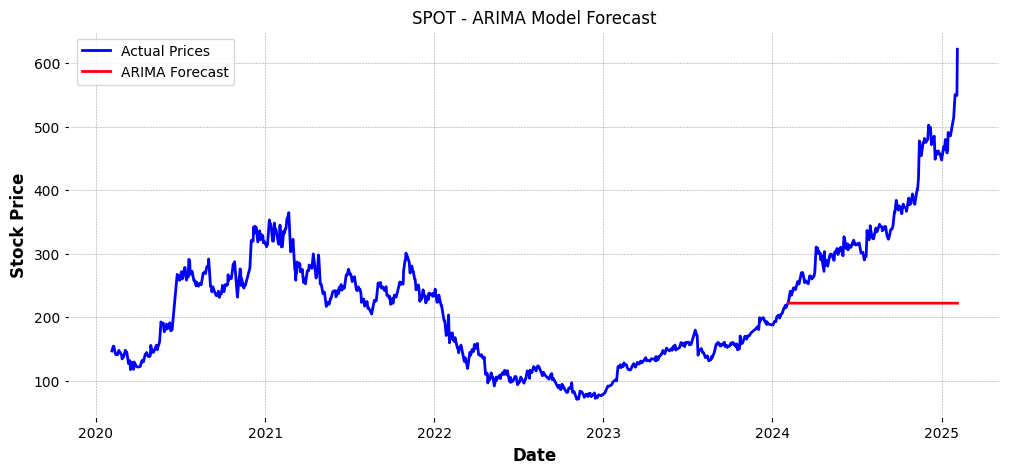

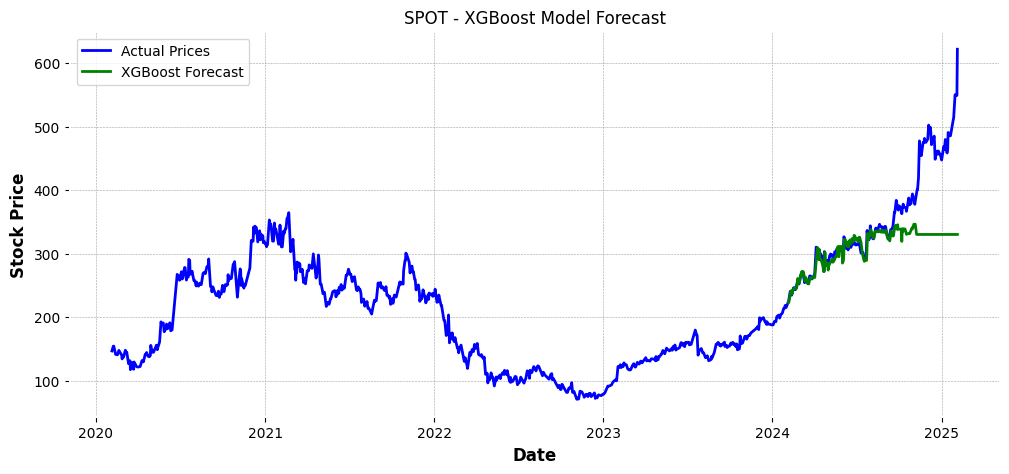

 Model Performance Comparison for SPOT:
ARIMA -> MAE: 130.7232, RMSE: 153.8007
XGBoost -> MAE: 310.2477, RMSE: 311.6854


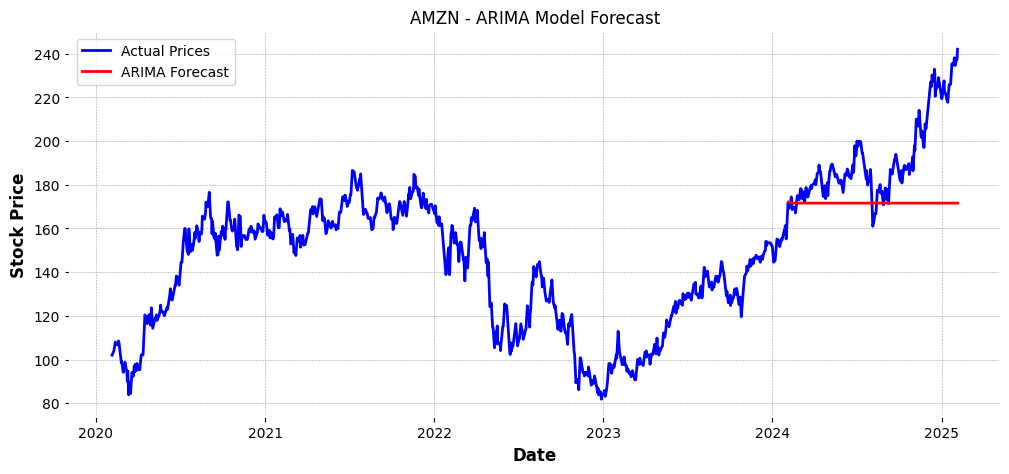

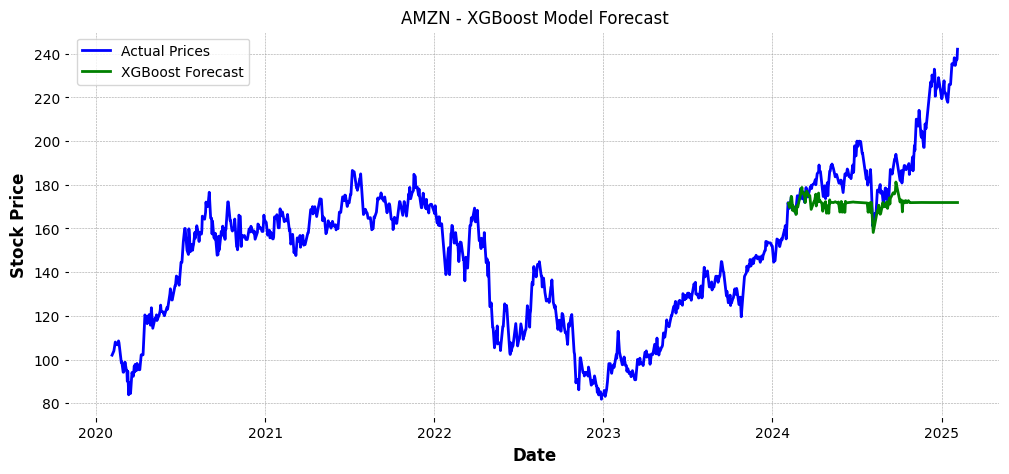

 Model Performance Comparison for AMZN:
ARIMA -> MAE: 20.5953, RMSE: 27.5366
XGBoost -> MAE: 170.9240, RMSE: 170.9434


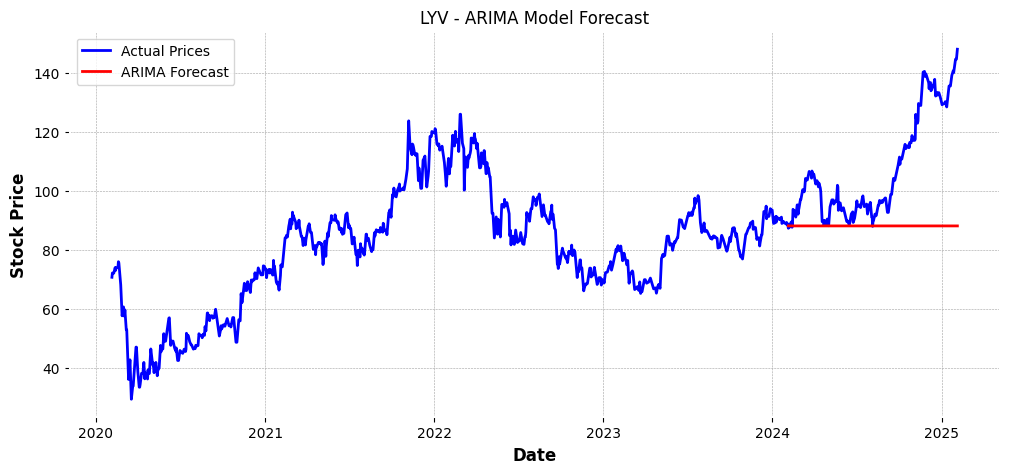

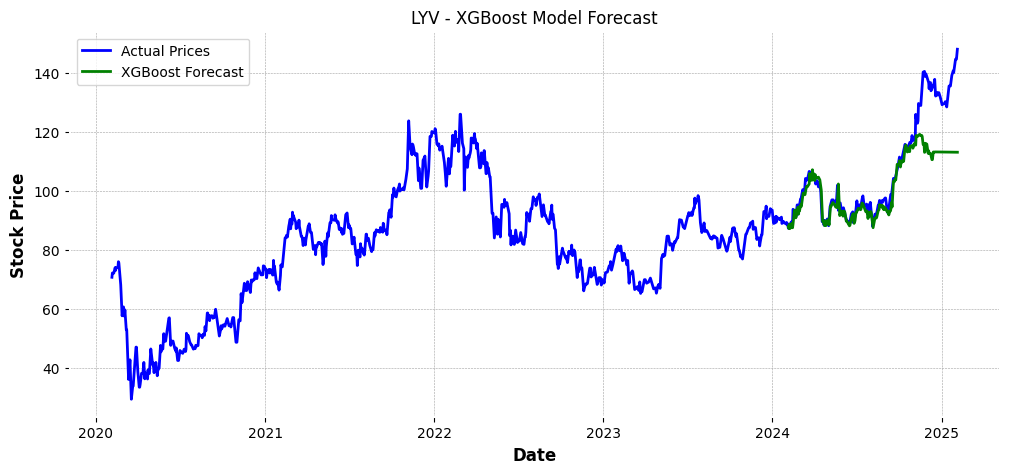

 Model Performance Comparison for LYV:
ARIMA -> MAE: 19.3319, RMSE: 25.8927
XGBoost -> MAE: 100.9534, RMSE: 101.4387


In [15]:
    
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb

# Define stock list
stocks = ['DIS', 'NFLX', 'SPOT', 'AMZN', 'LYV']


for stock in stocks:
    data = stock_data[stock]  
    data = data[['Close']]  

    # Ensure date index is sorted
    data = data.sort_index()

    
    if data.index.freq is None:
        data = data.asfreq('D', method='pad')  # Set frequency to daily

    
    # 1️ ARIMA MODEL
   
    # Train ARIMA on 80% of data
    train_size = int(len(data) * 0.8)
    train, test = data[:train_size], data[train_size:]

    # Fit ARIMA model
    arima_model = ARIMA(train, order=(5, 1, 0))  # ARIMA(5,1,0) is a common setting
    arima_result = arima_model.fit()

    # Forecast using ARIMA
    arima_forecast = arima_result.forecast(steps=len(test))

    # Plot ARIMA Predictions
    plt.figure(figsize=(12, 5))
    plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')
    plt.plot(test.index, arima_forecast, label='ARIMA Forecast', color='red')
    plt.legend()
    plt.title(f"{stock} - ARIMA Model Forecast")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.grid(True)
    plt.show()

    # 2️ XGBoost MODEL
    
    # Scale data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(data)

    # Prepare data for XGBoost
    def create_sequences(data, seq_length=50):
        X, y = [], []
        for i in range(len(data) - seq_length):
            X.append(data[i:i+seq_length])
            y.append(data[i+seq_length])
        return np.array(X), np.array(y)

    seq_length = 50
    X, y = create_sequences(scaled_data, seq_length)
    X_train, X_test = X[:train_size-seq_length], X[train_size-seq_length:]
    y_train, y_test = y[:train_size-seq_length], y[train_size-seq_length:]

    # Reshape data for XGBoost (2D array)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1])

    # Train XGBoost model
    xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.05, max_depth=6)
    xgb_model.fit(X_train, y_train)

    # Predict with XGBoost
    xgb_predictions = xgb_model.predict(X_test)
    xgb_predictions = scaler.inverse_transform(xgb_predictions.reshape(-1, 1))  # Convert back to original scale

    # Plot XGBoost Predictions
    plt.figure(figsize=(12, 5))
    plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')
    plt.plot(data.index[-len(xgb_predictions):], xgb_predictions, label='XGBoost Forecast', color='green')
    plt.legend()
    plt.title(f"{stock} - XGBoost Model Forecast")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.grid(True)
    plt.show()

   
    #  Performance Comparison
   
    # Compute errors for ARIMA
    arima_mae = mean_absolute_error(test, arima_forecast)
    arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))

    # Compute errors for XGBoost
    xgb_mae = mean_absolute_error(y_test, xgb_predictions)
    xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))

    # Print comparison results
    print(f" Model Performance Comparison for {stock}:")
    print(f"ARIMA -> MAE: {arima_mae:.4f}, RMSE: {arima_rmse:.4f}")
    print(f"XGBoost -> MAE: {xgb_mae:.4f}, RMSE: {xgb_rmse:.4f}")




**Write codes to implement the solution in python:**

In [1]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary









# Results: summarize and visualize the results discovered from the analysis

**The analysis involved multiple predictive models to forecast stock prices. Below are the summarized findings:**

# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary

# Performance Metrics Summary -> Summarize the results of different models

  The project tested two models, ARIMA and XGBoost, to predict stock prices for five companies (DIS, NFLX, SPOT, AMZN, and LYV). The ARIMA model performed better, with lower errors in all cases. The Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) were significantly lower for ARIMA, indicating more accurate predictions.

XGBoost had much higher errors, meaning it struggled with stock price forecasting in its current form. Among the stocks, Netflix (NFLX) and Spotify (SPOT) had the highest prediction errors, while Amazon (AMZN) and Live Nation (LYV) were the easiest to predict.


# Explanation of Results
The ARIMA model works well for time-series forecasting because it captures historical patterns and trends effectively. It consistently made more accurate predictions with lower errors across all five stocks.

XGBoost, on the other hand, struggled with stock price data, possibly due to the lack of additional features like trading volume, market indicators, or macroeconomic factors. This model is more suited for structured, tabular data rather than pure time-series forecasting without additional feature engineering.

Stocks like Netflix and Spotify showed larger errors, suggesting higher market volatility, making them harder to predict with traditional models.

# Comparison of Performance
ARIMA outperformed XGBoost in predicting stock prices for all companies.
XGBoost had very high errors, showing it may need feature improvements to be effective in stock forecasting.
Amazon (AMZN) and Live Nation (LYV) were easier to predict, likely due to more stable stock movements.
Netflix (NFLX) and Spotify (SPOT) were the hardest to predict, possibly due to external market influences and higher volatility.

# Conclusion
The ARIMA model is the better choice for stock price prediction in this study. It consistently produced lower errors and more reliable forecasts.

For improving XGBoost performance, adding more financial indicators, technical indicators, or hybrid modeling (combining ARIMA with XGBoost) could be helpful.

Future research could also explore deep learning models like LSTMs, which are designed specifically for sequential data and could further improve prediction accuracy.


